<a href="https://colab.research.google.com/github/howardatri/notes/blob/main/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%matplotlib inline
import random
import torch


In [18]:
def synthetic_data(w,b,num_examples):
  """ 生成y = xw + b +噪声"""
  X= torch.normal(0,1,(num_examples,len(w)))
  y = torch.matmul(X, w.reshape((-1, 1))) + b
  y += torch.normal(0,0.01,y.shape)
  return X , y.reshape((-1,1))

In [19]:
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

In [20]:
print('features:',features[0],'\nlabel:',labels[0])


features: tensor([-2.5321, -0.1459]) 
label: tensor([-0.3556])


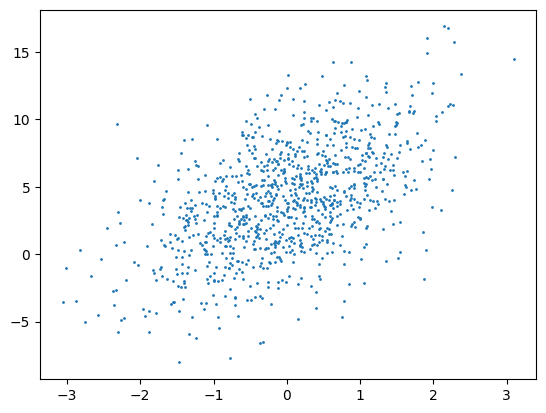

In [21]:
from matplotlib import pyplot as plt

# Detach features and labels from the computation graph and convert to numpy
plt.scatter(features[:, 0].detach().numpy(), labels.detach().numpy(), 1);

定义一个data_iter函数，接收批量大小，特征矩阵和标签向量作为输入，生成大小为batch_size的小批量


In [25]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # These examples are read at random, without a particular order
    random.shuffle(indices)

    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
  print(X, '\n',y)
  break

tensor([[-0.9495, -0.9787],
        [ 0.2820, -0.7350],
        [-2.3253,  0.6445],
        [-0.4954, -1.9017],
        [ 0.6174, -1.3527],
        [-0.7719,  1.5371],
        [-0.9994,  1.0574],
        [-0.4650,  0.7319],
        [-0.4263,  0.6137],
        [-0.7856,  0.0946]]) 
 tensor([[ 5.6184],
        [ 7.2557],
        [-2.6425],
        [ 9.6681],
        [10.0316],
        [-2.5560],
        [-1.3872],
        [ 0.7824],
        [ 1.2491],
        [ 2.3150]])


In [27]:
# 定义初始化模型参数
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)
#定义模型
def linreg(X,w,b):
  """线性回归模型"""
  return torch.matmul(X,w) + b



In [28]:
# 定义损失函数
def squared_loss(y_hat,y):
  """均方损失"""
  return (y_hat - y.reshape(y_hat.shape))**2 / 2


In [35]:
# 定义优化算法
def sgd(params,lr,batch_size):
  """小批量随机梯度下降"""
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()


In [53]:
lr = 0.02  # 学习率
num_epochs = 10  # 训练轮数
net = linreg  # 线性回归模型
loss = squared_loss  # 均方损失函数

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 计算l关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.000053
epoch 2, loss 0.000053
epoch 3, loss 0.000053
epoch 4, loss 0.000053
epoch 5, loss 0.000053
epoch 6, loss 0.000053
epoch 7, loss 0.000053
epoch 8, loss 0.000053
epoch 9, loss 0.000053
epoch 10, loss 0.000053
